In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data = pd.read_csv("/content/amazon_alexa.tsv", delimiter='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
data.dropna(inplace = True)

In [ ]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
print(data['rating'].value_counts())

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


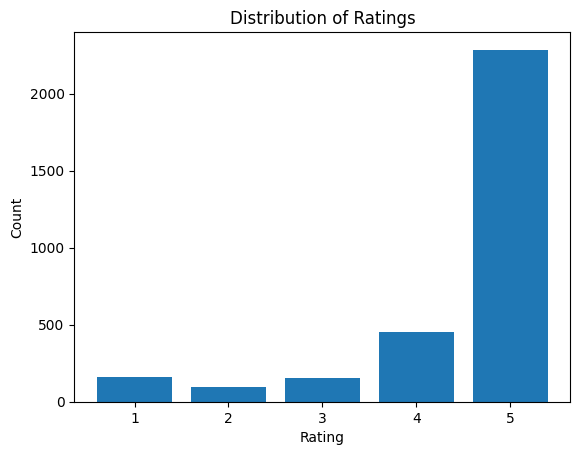

In [ ]:
plt.bar(data['rating'].value_counts().index, data['rating'].value_counts())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
data['feedback'] = data['rating'].apply(lambda x: '2' if x >= 4 else '0' if x <= 2 else '1')
data['feedback'] = data['feedback'].astype(int)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,2,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,2,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",2,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,2,172
4,5,31-Jul-18,Charcoal Fabric,Music,2,5


In [ ]:
data['feedback'].value_counts()

,count
feedback,
2,2741
0,256
1,152


([<matplotlib.patches.Wedge at 0x78540a12c220>,
 [Text(0.9574377964285085, 0.5415836647925436, 'Black  Dot'),
  Text(0.1231998574019022, 1.0930790434072695, 'Charcoal Fabric '),
  Text(-0.6795696670376689, 0.8649769174043387, 'Configuration: Fire TV Stick'),
  Text(-1.0552171496494571, 0.3106714777472749, 'Black  Plus'),
  Text(-1.0665031470678195, -0.2693901210037914, 'Black  Show'),
  Text(-0.7880310259113028, -0.7674679812221351, 'Black'),
  Text(-0.322757246694268, -1.0515834535149056, 'Black  Spot'),
  Text(0.13845447495088098, -1.0912517392270566, 'White  Dot'),
  Text(0.4946413984053883, -0.982512028925632, 'Heather Gray Fabric '),
  Text(0.7350100844556154, -0.8183887680977479, 'White  Spot'),
  Text(0.8819834657378277, -0.6573470667501988, 'Sandstone Fabric '),
  Text(0.9852113719921053, -0.4892428359183543, 'White'),
  Text(1.055217144195614, -0.3106714962716295, 'White  Show'),
  Text(1.0915936704156108, -0.13573230532402758, 'White  Plus'),
  Text(1.099439494810116, -0.0351

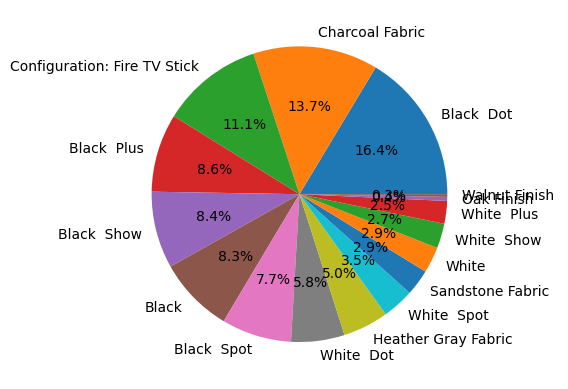

In [ ]:
plt.pie(data['variation'].value_counts(), labels = data['variation'].value_counts().index, autopct = '%1.1f%%')

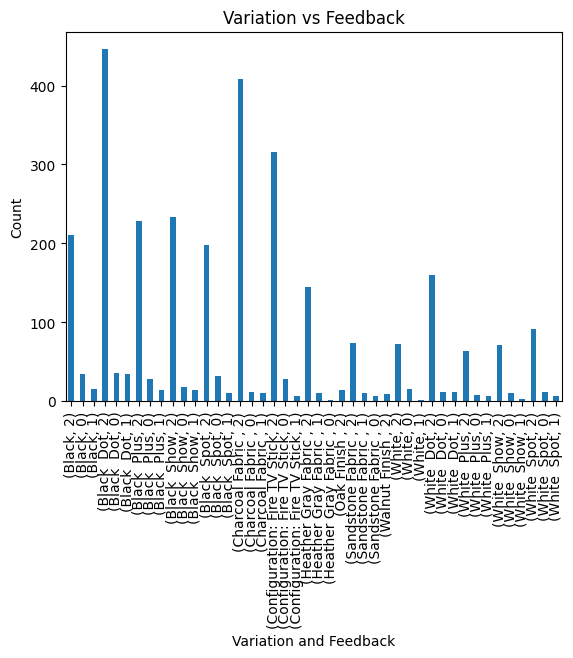

In [ ]:
from itertools import groupby
data.groupby('variation')['feedback'].value_counts().plot.bar()
plt.title('Variation vs Feedback')
plt.xlabel('Variation and Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['verified_reviews'])

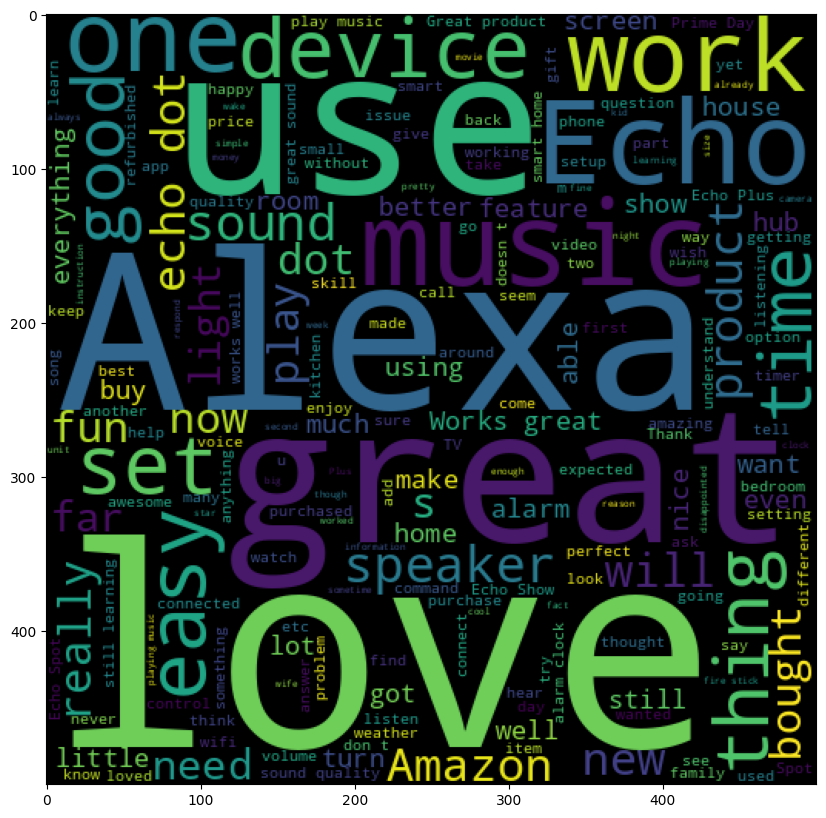

In [ ]:
review = " ".join(review for review in data.verified_reviews)

WC = WordCloud(width = 500, height = 500).generate(review)
plt.figure(figsize = (15, 10))
plt.imshow(WC)

In [ ]:
from nltk.stem import PorterStemmer
corpus = []
stemmer = PorterStemmer()
for review in data['verified_reviews']:
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review = review.split()
  review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
cv = CountVectorizer(stop_words = 'english')
X = cv.fit_transform(corpus)
y = data['feedback']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean = False)
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scl, y_train)
knn.score(X_test_scl, y_test)
y_pred = knn.predict(X_test_scl)

In [ ]:
print(("test accuracy") , (knn.score(X_test_scl, y_test)))
print(("train accuracy") , (knn.score(X_train_scl, y_train)))

test accuracy 0.846031746031746
train accuracy 0.8908296943231441


In [ ]:
accuracy_score(y_test, y_pred)

0.846031746031746

              precision    recall  f1-score   support

           0       0.50      0.03      0.06        63
           1       0.00      0.00      0.00        40
           2       0.84      1.00      0.91       527

    accuracy                           0.84       630
   macro avg       0.45      0.34      0.32       630
weighted avg       0.75      0.84      0.77       630



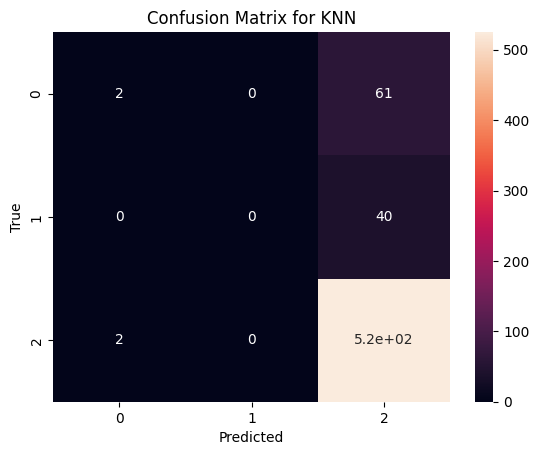

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_scl, y_train)
y_pred2 = rf.predict(X_test_scl)

In [ ]:
rf.score(X_test_scl, y_test)

0.8857142857142857

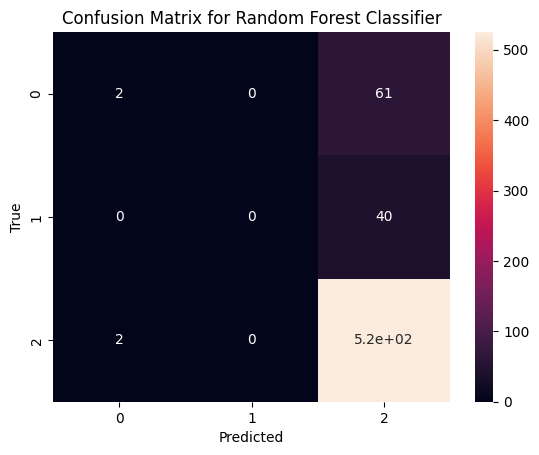

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot = True)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuries = cross_val_score(estimator = rf, X = X_train_scl, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuries.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuries.std()*100))


Accuracy: 91.39 %
Standard Deviation: 1.50 %


In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80,100],
    'min_samples_split' : [8,10],
    'n_estimators': [100,200]
}

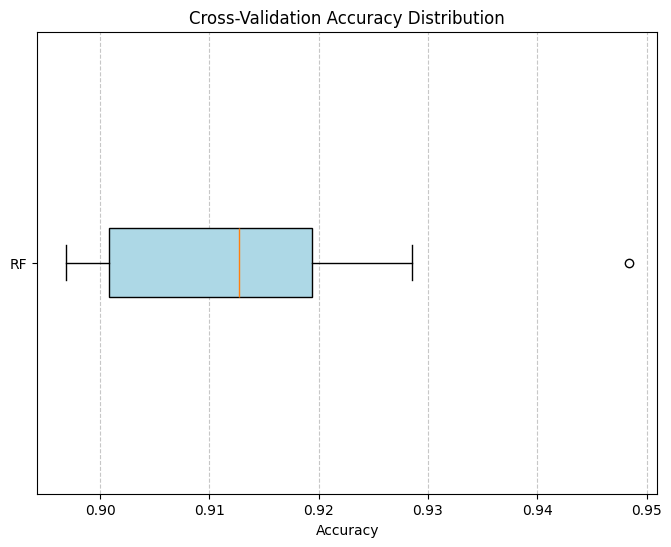

In [ ]:
import matplotlib.pyplot as plt

# Box plot for cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(accuries, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy")
plt.yticks([1], ["RF"])
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


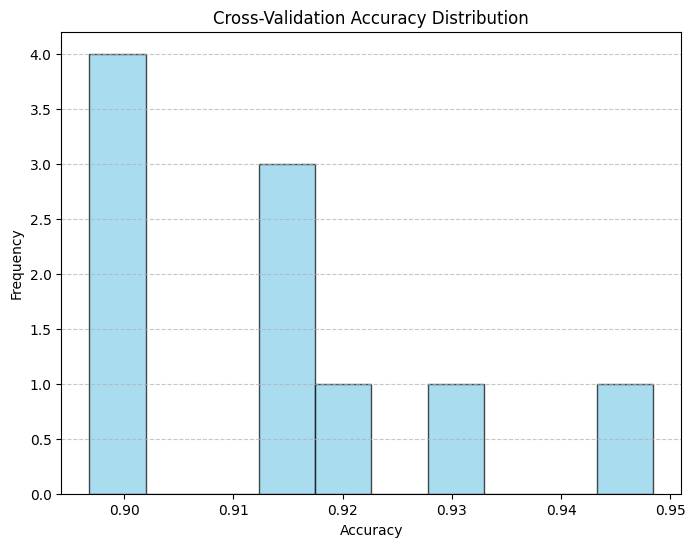

In [ ]:
# Histogram for cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(accuries, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Cross-Validation Accuracy Distribution")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
cv_object = GridSearchCV(estimator = rf, param_grid = params, cv = 3, n_jobs = -1, verbose = 2)
cv_object.fit(X_train_scl, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:
print("best parameters: ", cv_object.best_params_)
print("best score: ", cv_object.best_score_)

best parameters:  {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 200}
best score:  0.8924182227519534


In [ ]:
y_train.unique()

array([2, 0, 1])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 100)
abc.fit(X_train_scl, y_train)
y_pred = abc.predict(X_test_scl)

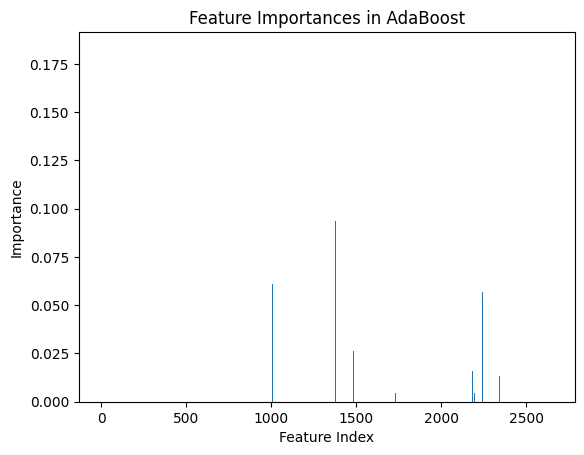

In [ ]:
feature_importances = abc.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances in AdaBoost")
plt.show()

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scl.toarray())
X_test_pca = pca.transform(X_test_scl.toarray())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Train models on PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)




KNeighborsClassifier()

In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train_pca, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

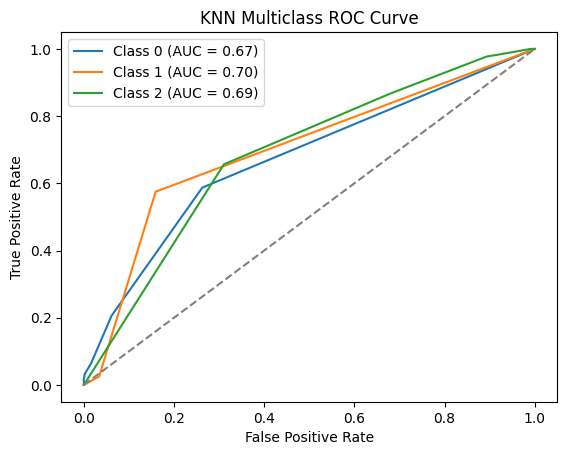

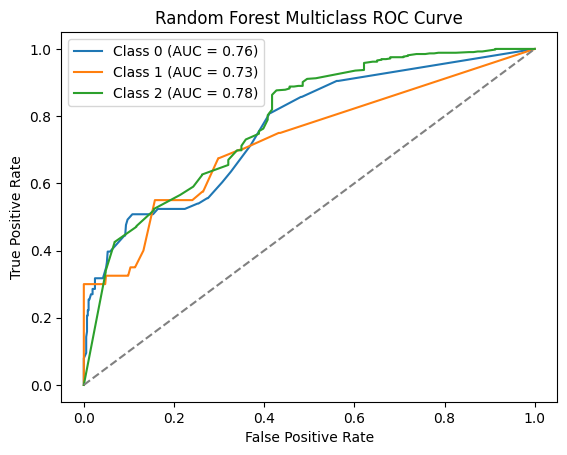

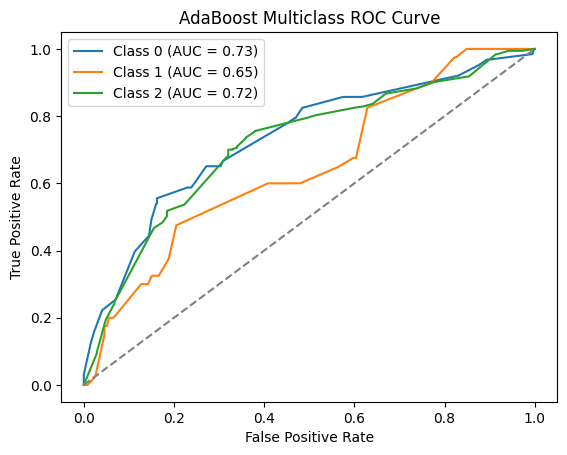

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Function to plot multiclass ROC curve
def plot_multiclass_roc_curve(model, X_test, y_test, title, n_classes):
    # Binarize the labels for multiclass ROC calculation
    y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        raise ValueError(f"{model.__class__.__name__} does not support predict_proba.")

    # Plot ROC curve for each class
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})")

    # Plot random chance line
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

# Number of classes in your target
n_classes = len(np.unique(y_test))

# Plot for each model
plot_multiclass_roc_curve(knn, X_test_pca, y_test, "KNN Multiclass ROC Curve", n_classes)
plot_multiclass_roc_curve(rf, X_test_pca, y_test, "Random Forest Multiclass ROC Curve", n_classes)
plot_multiclass_roc_curve(abc, X_test_pca, y_test, "AdaBoost Multiclass ROC Curve", n_classes)
